 Noise sweep: effect of stochasticity

In [3]:
import os, sys
sys.path.append(os.path.abspath(".."))

import numpy as np
import matplotlib.pyplot as plt

from src.universe_sim import run_simulation
from src.metrics import nearest_neighbor_distance, largest_cluster_fraction

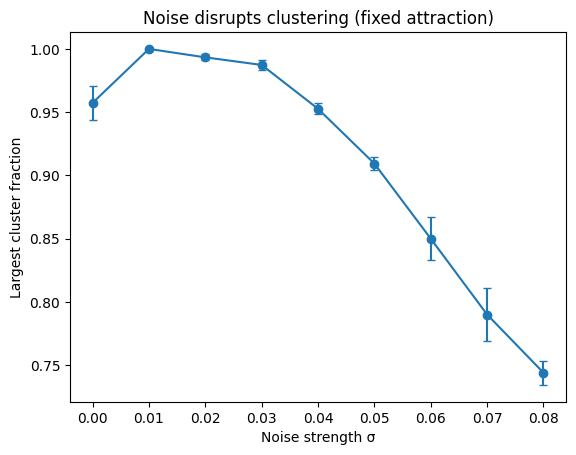

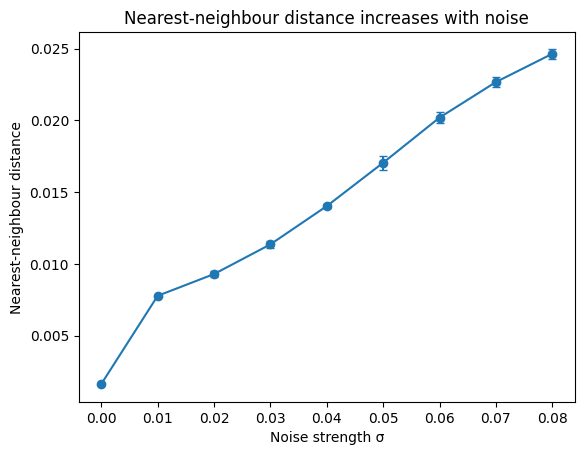

In [4]:
# Fixed settings
N = 300
steps = 400
box_size = 1.0

A = 0.08          # pick a value where clustering exists at low noise
repulsion = 0.02
eps = 0.05        # distance threshold used in largest_cluster_fraction
seed_list = [0, 1, 2, 3, 4]

noise_values = np.linspace(0.0, 0.08, 9)

mean_lcf, std_lcf = [], []
mean_nn, std_nn = [], []

for sigma in noise_values:
    lcf_runs = []
    nn_runs = []

    for s in seed_list:
        history = run_simulation(
            N=N,
            steps=steps,
            box_size=box_size,
            attraction=A,
            repulsion=repulsion,
            noise=sigma,
            seed=s,
            save_every=steps,   # only save final state to keep memory small
        )
        final_pos = history[-1]

        lcf_runs.append(largest_cluster_fraction(final_pos, eps=eps, box_size=box_size))
        nn_runs.append(nearest_neighbor_distance(final_pos, box_size=box_size))

    mean_lcf.append(np.mean(lcf_runs))
    std_lcf.append(np.std(lcf_runs, ddof=1) / np.sqrt(len(seed_list)))
    mean_nn.append(np.mean(nn_runs))
    std_nn.append(np.std(nn_runs, ddof=1) / np.sqrt(len(seed_list)))

mean_lcf = np.array(mean_lcf)
std_lcf = np.array(std_lcf)
mean_nn = np.array(mean_nn)
std_nn = np.array(std_nn)

plt.figure()
plt.errorbar(noise_values, mean_lcf, yerr=std_lcf, marker="o", capsize=3)
plt.xlabel("Noise strength σ")
plt.ylabel("Largest cluster fraction")
plt.title("Noise disrupts clustering (fixed attraction)")
plt.show()

plt.figure()
plt.errorbar(noise_values, mean_nn, yerr=std_nn, marker="o", capsize=3)
plt.xlabel("Noise strength σ")
plt.ylabel("Nearest-neighbour distance")
plt.title("Nearest-neighbour distance increases with noise")
plt.show()

### Limiting cases: high-noise regime

To further validate the interpretation of the noise sweep, we inspect extreme noise values.
In the high-noise limit, stochastic fluctuations are expected to disrupt coherent structure,
leading to a more homogeneous spatial distribution.

We therefore visualize the final particle configuration for:
- very low noise (σ ≈ 0)
- very high noise (largest σ in the sweep)

This provides a qualitative sanity check complementary to the quantitative observables.

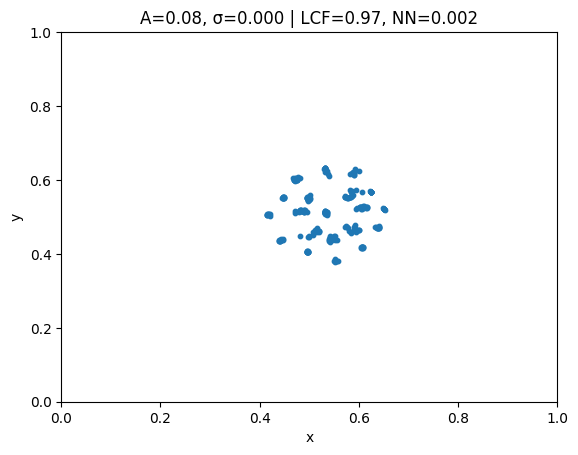

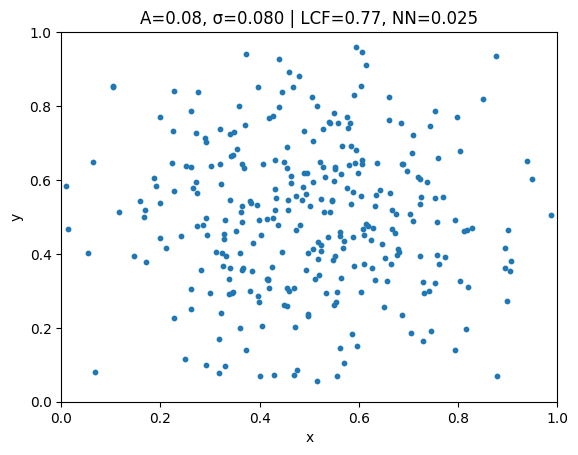

In [5]:
def plot_final_configuration(sigma, seed=0):
    history = run_simulation(
        N=N,
        steps=steps,
        box_size=box_size,
        attraction=A,
        repulsion=repulsion,
        noise=sigma,
        seed=seed,
        save_every=steps,   # only keep final state
    )

    final_pos = history[-1]

    lcf = largest_cluster_fraction(final_pos, eps=eps, box_size=box_size)
    nn = nearest_neighbor_distance(final_pos, box_size=box_size)

    plt.figure()
    plt.scatter(final_pos[:, 0], final_pos[:, 1], s=10)
    plt.xlim(0, box_size)
    plt.ylim(0, box_size)
    plt.title(f"A={A:.2f}, σ={sigma:.3f} | LCF={lcf:.2f}, NN={nn:.3f}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()


# visualize two extreme cases
plot_final_configuration(noise_values[0], seed=0)
plot_final_configuration(noise_values[-1], seed=0)

At low noise, particles collapse into a compact cluster, consistent with a large largest-cluster fraction.
At high noise, the cluster is partially or fully disrupted, and particles spread over the domain.

This qualitative observation agrees with the trends observed in the noise sweep